In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-market-dataset/symbols_valid_meta.csv
/kaggle/input/stock-market-dataset/stocks/MTL.csv
/kaggle/input/stock-market-dataset/stocks/JOE.csv
/kaggle/input/stock-market-dataset/stocks/DRE.csv
/kaggle/input/stock-market-dataset/stocks/CTY.csv
/kaggle/input/stock-market-dataset/stocks/AMSF.csv
/kaggle/input/stock-market-dataset/stocks/IMH.csv
/kaggle/input/stock-market-dataset/stocks/GFL.csv
/kaggle/input/stock-market-dataset/stocks/CLM.csv
/kaggle/input/stock-market-dataset/stocks/UBER.csv
/kaggle/input/stock-market-dataset/stocks/NEBU.csv
/kaggle/input/stock-market-dataset/stocks/SGB.csv
/kaggle/input/stock-market-dataset/stocks/WWW.csv
/kaggle/input/stock-market-dataset/stocks/UTSI.csv
/kaggle/input/stock-market-dataset/stocks/PBB.csv
/kaggle/input/stock-market-dataset/stocks/UFCS.csv
/kaggle/input/stock-market-dataset/stocks/ZM.csv
/kaggle/input/stock-market-dataset/stocks/DCPH.csv
/kaggle/input/stock-market-dataset/stocks/HALL.csv
/kaggle/input/stock-market-dataset/s

In [2]:
df = pd.read_csv('/kaggle/input/stock-market-dataset/etfs/HEFA.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-02-14,24.520000,24.520000,24.520000,24.520000,19.680775,1300
1,2014-02-18,24.709999,24.709999,24.709999,24.709999,19.833277,1700
2,2014-02-19,24.730000,24.730000,24.730000,24.730000,19.849331,300
3,2014-02-20,24.730000,24.730000,24.730000,24.730000,19.849331,0
4,2014-02-21,24.730000,24.730000,24.730000,24.730000,19.849331,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1543 non-null   object 
 1   Open       1543 non-null   float64
 2   High       1543 non-null   float64
 3   Low        1543 non-null   float64
 4   Close      1543 non-null   float64
 5   Adj Close  1543 non-null   float64
 6   Volume     1543 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 84.5+ KB


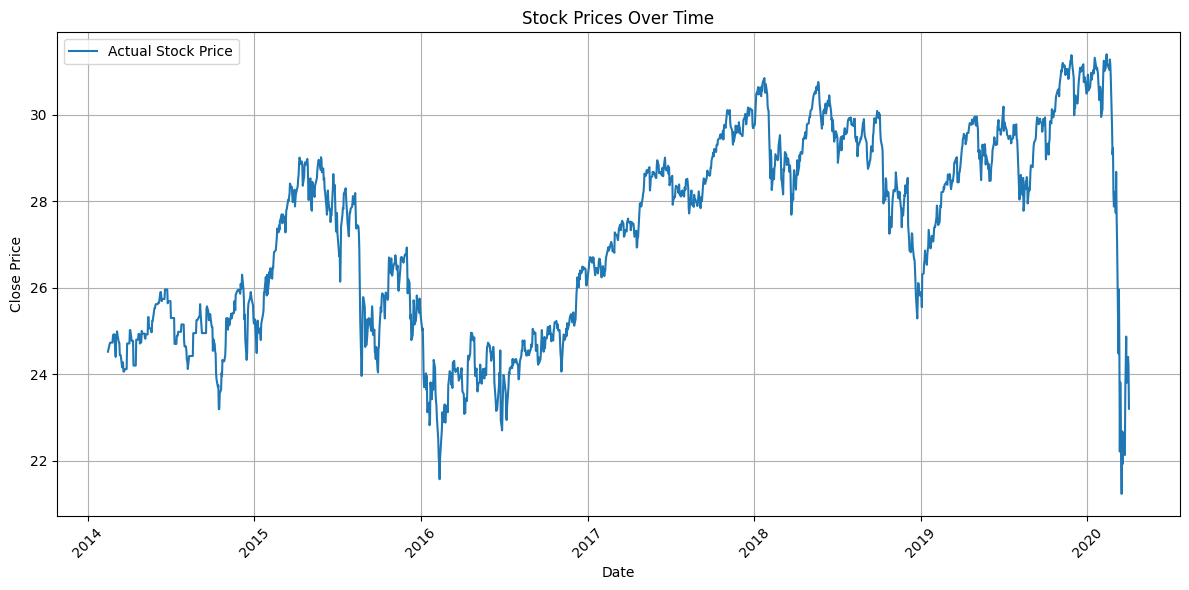

In [5]:
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

# Plot the actual 'Close' prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Actual Stock Price')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()